# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot as plt
from scipy import stats


# A. Solve using Analytical Calculus - Random data points

## Create random X and y samples

In [2]:
# Generate 'random' data
np.random.seed(0)

# Number of Samples
n = 100

# Create r and r1, random vectors of 100 numbers each with mean = 0 and standard deviation = 1
r = np.random.randn(n)
r1 = np.random.randn(n)

# Create random Input vector X using r
# mean = 3
# stddev = 5
X = 3 * r + 2

# Create random Residual term Res using r
# mean = 0
# stddev = 0.5
res = 0.8 * r1 

# Generate Y values based on the simulated regression line and error/noise
# Population Regression Line
yreg = 2.5 + 0.35 * X 
# Adding noise/error
y = yreg + res                  

# Storing Population Regression Line "RegL", data points X and y in a data frame
rl = pd.DataFrame(
    {'X': X,
     'y': y,
     'RegL':yreg}
)

# Show the first five rows of our dataframe
rl.head()

,X,y,RegL
0,7.292157,6.558776,5.052255
1,3.200472,2.541958,3.620165
2,4.936214,3.211287,4.227675
3,8.722680,6.328455,5.552938
4,7.602674,4.222437,5.160936


## Calculate coefficients 

In [7]:
# Assuming y = aX + b
# a ~ alpha
# b ~ beta

# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of alpha
rl['CovXY'] = (rl['X'] - xmean) * (rl['y'] - ymean)
rl['VarX'] = (rl['X'] - xmean)**2

# Calculate alpha
# Numerator: Covariance between X and y
# Denominator: Variance of X
alpha = rl['CovXY'].sum() / rl['VarX'].sum()

# Calculate beta
beta = ymean - (alpha * xmean)
print('alpha =', alpha)
print('beta =',beta)

alpha = 0.3805862489457016
beta = 2.4989499701506084


## Calculating RSS and RSE(σ)

In [8]:
# Residual Errors
RE = (rl['y'] - ymean)**2
#Residual Sum Squares
RSS = RE.sum()
print("Residual Sum of Squares (RSS) is:",RSS)

# Estimated Standard Variation (sigma) or RSE
RSE = np.sqrt(RSS/(n-2))
print("\nResidual Standar Error (Standard Deviation σ) is:",RSE)

Residual Sum of Squares (RSS) is: 200.08348097850993

Residual Standar Error (Standard Deviation σ) is: 1.4288695438178047


## Assessing Coefficients accuracy

In [9]:
# Degrees of freedom
df = 2*n - 2

# Standard error, t-Statistic and  p-value for Slope "alpha" coefficient
SE_alpha = np.sqrt(RSE**2/rl['VarX'].sum())
t_alpha = alpha/SE_alpha
p_alpha = 1 - stats.t.cdf(t_alpha,df=df)

# Standard error, t-Statistic and  p-value for Intercept "beta" coefficient
SE_beta = np.sqrt(RSE*(1/n + xmean**2/(rl['VarX'].sum())))
t_beta = beta/SE_beta 
p_beta = 1 - stats.t.cdf(t_beta,df=df)



## Model Assessment Summary

In [10]:
# Model Assessment - Storing all key indicators in dummy data frame with range 1
ms = pd.DataFrame(
    {'Ref': range(0,1),
     'Residual Sum of Squares (RSS)': RSS,
     'RSE (Standard Deviation σ)':RSE,
     }
)

# Cut out the dummy index column to see the Results
ms.iloc[:,1:9]    

,Residual Sum of Squares (RSS),RSE (Standard Deviation σ)
0,200.083481,1.42887


## Coefficients Assessment Summary

In [11]:
# Assessment of Coefficients
mds = pd.DataFrame(
    {'Name':['Slope (alpha)', 'Intercept (beta)'],
     'Coefficient': [alpha, beta],
     'RSE':[SE_alpha, SE_beta],
     't-Statistic':[t_alpha, t_beta],
     'p-Value':[p_alpha, p_beta]
    }
)
mds

,Name,Coefficient,RSE,t-Statistic,p-Value
0,Slope (alpha),0.380586,0.047256,8.053628,3.685940e-14
1,Intercept (beta),2.498950,0.147351,16.959178,0.000000e+00


## Prediction - Least Squares Line

In [12]:
ypred = alpha * X + beta

## Plot Predicted vs Actual vs Sampled Data

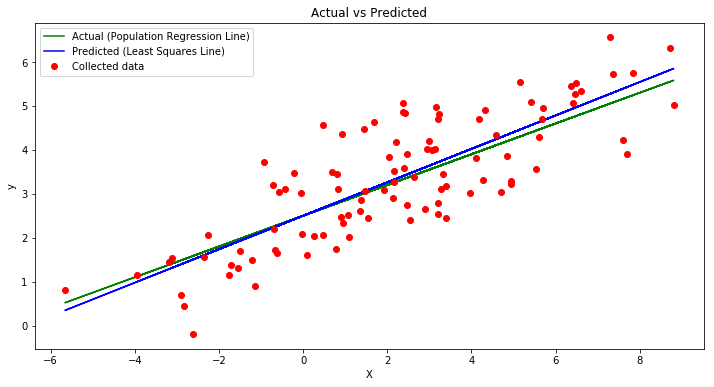

In [13]:

# Plot regression against actual data
plt.figure(figsize=(12, 6))
# Population Regression Line
plt.plot(X,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
plt.plot(X, ypred, label = 'Predicted (Least Squares Line)', color='blue')     
# scatter plot showing actual data
plt.plot(X, y, 'ro', label ='Collected data')   
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# B. Solve using Matrix Algebra - Fixed data points

## Create and Format Data

input = array([
	[0.05, 0.12],
	[0.18, 0.22],
	[0.31, 0.35],
	[0.42, 0.38],
	[0.5, 0.49],
	])
m = np.shape(input)[0]
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix(input[:,1]).T

In [14]:
#np.matrix(input[:,1]).T
X.shape

(100,)

## Solve for projection matrix

In [15]:
A = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

m = np.asscalar(A[1])
b = np.asscalar(A[0])

print("b (bias/Y intercept) =",b,", and m (slope) =",m)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## Plot data and predictions

In [ ]:
xx = np.linspace(0, .5, 2)
yy = np.array(b + m * xx)

In [ ]:
plt.figure(1)
plt.scatter(input[:,0], input[:,1], color='r')
plt.plot(xx, yy.T, color='b')
plt.show()